### Kernel Regression Method in Python

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

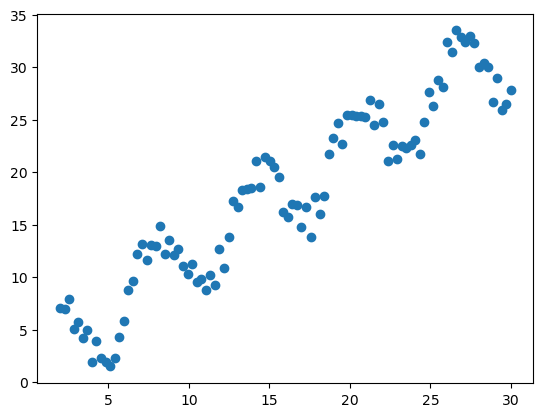

In [36]:
#Prepare the data
x=np.linspace(2,30,100)
x=x[:,np.newaxis]
x=np.stack([x[:,0],np.ones(x.shape[0])],axis=1).reshape(-1,2)
y= np.sin(x[:,0])+x[:,1]
y= x[:,0] + 4*np.sin(x[:,0])+ 4*np.random.rand(x.shape[0])
plt.scatter(x[:,0],y)

In [37]:
#Prepare the kernel
def kernel(x_i,x_j,op="Gaussian"):
    if op == "Linear":
        return np.dot(x_i,x_j)
    elif op == "Quadratic":
        return np.dot(x_i,x_j)**2
    else:
        return np.exp(-0.5*np.linalg.norm(x_i-x_j))

In [38]:
#Precompute the kernel matrix
K = np.zeros((x.shape[0],x.shape[0]))
for i, row in enumerate(K):
    for j, col in enumerate(K.T):
        #print(kernel(x[i,:],x[j,:]))
        K[i,j]= kernel(x[i,:],x[j,:])


In [39]:
#Compute the normal equations
A = np.linalg.inv(K+0.1*np.eye(K.shape[0]))
M = np.dot(y,A)
print(M)


[ 3.01218389  0.28877919  7.17096622 -4.93300266  3.07880544 -2.493926
  5.74307132 -7.81584725  5.51016789 -1.35369664 -0.83733977 -3.29773043
 -2.80095222  0.05412396 -1.97640349  4.15521775 -1.28093662  4.76649455
  5.65016691 -3.59360721  2.42177977 -1.3007663   8.94702558 -5.02465951
  4.89912472 -1.61140816  4.46616726 -0.88168909 -2.2380155   5.15454975
 -2.48140468  2.06893171 -3.72469943  3.36944847 -6.30283517  8.55506258
 -7.84618444 -0.13330628  8.74730309 -1.37908415  4.0044557   1.01347688
 -2.22929597  9.46870872 -6.83902267  6.7823258   3.47104428  3.38225163
  5.42591757 -4.75059285 -3.17906785  4.00350982  4.28952571 -5.02586206
  7.26883218 -9.80055638  8.93815875 -5.23811537 -3.70017371  5.81990356
  4.10007765  7.60862981 -5.95338977  6.21132041  2.64107745  1.75897723
  1.45972289 -0.41143988  8.39600532 -4.30110327  8.76470161  5.30963153
 -7.95004414  4.87955991 -2.89731225  3.452329    1.07950086  1.37693213
  3.54309711 -6.88156266  1.79972983  9.48898108 -3.6

In [40]:
#Make predictions
x_pred=np.arange(0,35,0.2)
x_pred=np.stack([x_pred,np.ones(x_pred.shape[0])],axis=1).reshape(-1,2)
y_pred=np.zeros(x_pred.shape[0])
for outer_i, x_p in enumerate(x_pred):
    k = np.zeros(x.shape[0])
    for i, row in enumerate(k):
        k[i]=kernel(x_p,x[i,:])
    y_pred[outer_i]=np.dot(M,k)
    #print(y_pred)


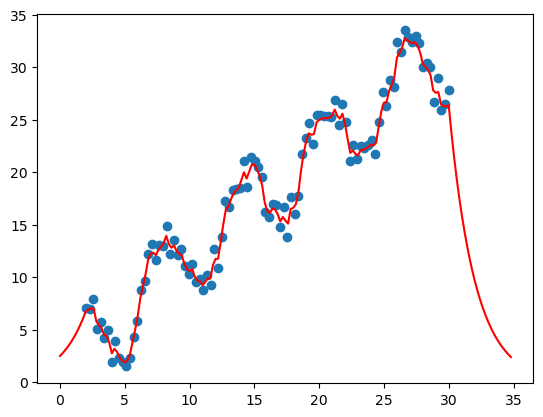

In [41]:
#Plot the results
plt.plot(x_pred[:,0],y_pred,c='red')
plt.scatter(x[:,0],y)
plt.show()
